# California Housing Prices Dataset
An end-to-end Machine Learning Regression Project.

## Step 1: Downloading and Unzip the data

In [1]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
filename = "Data/California Housing Data.zip"
  
# opening the zip file in READ mode 
with ZipFile(filename, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    print()
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall(path = f'./{filename[:-4]}') 
    print('Done!') 

File Name                                             Modified             Size
housing.csv                                    2019-09-22 01:36:12      1423529

Extracting all the files now...
Done!


## Step 2: Exploring the dataset and understanding the structure.

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv(f'{filename[:-4]}/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Seems like `total_bedrooms` feature has a few missing values,207 to be precise. 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Let's convert our only categorical feature to numbers too, since ML models love to see only numbers....

In [7]:
df['ocean_proximity'] = df['ocean_proximity'].map({'ISLAND':5,'NEAR BAY':4,'NEAR OCEAN':3,'INLAND':1,'<1H OCEAN':2})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


Let's create an histogram to see distribution of all the numerical features

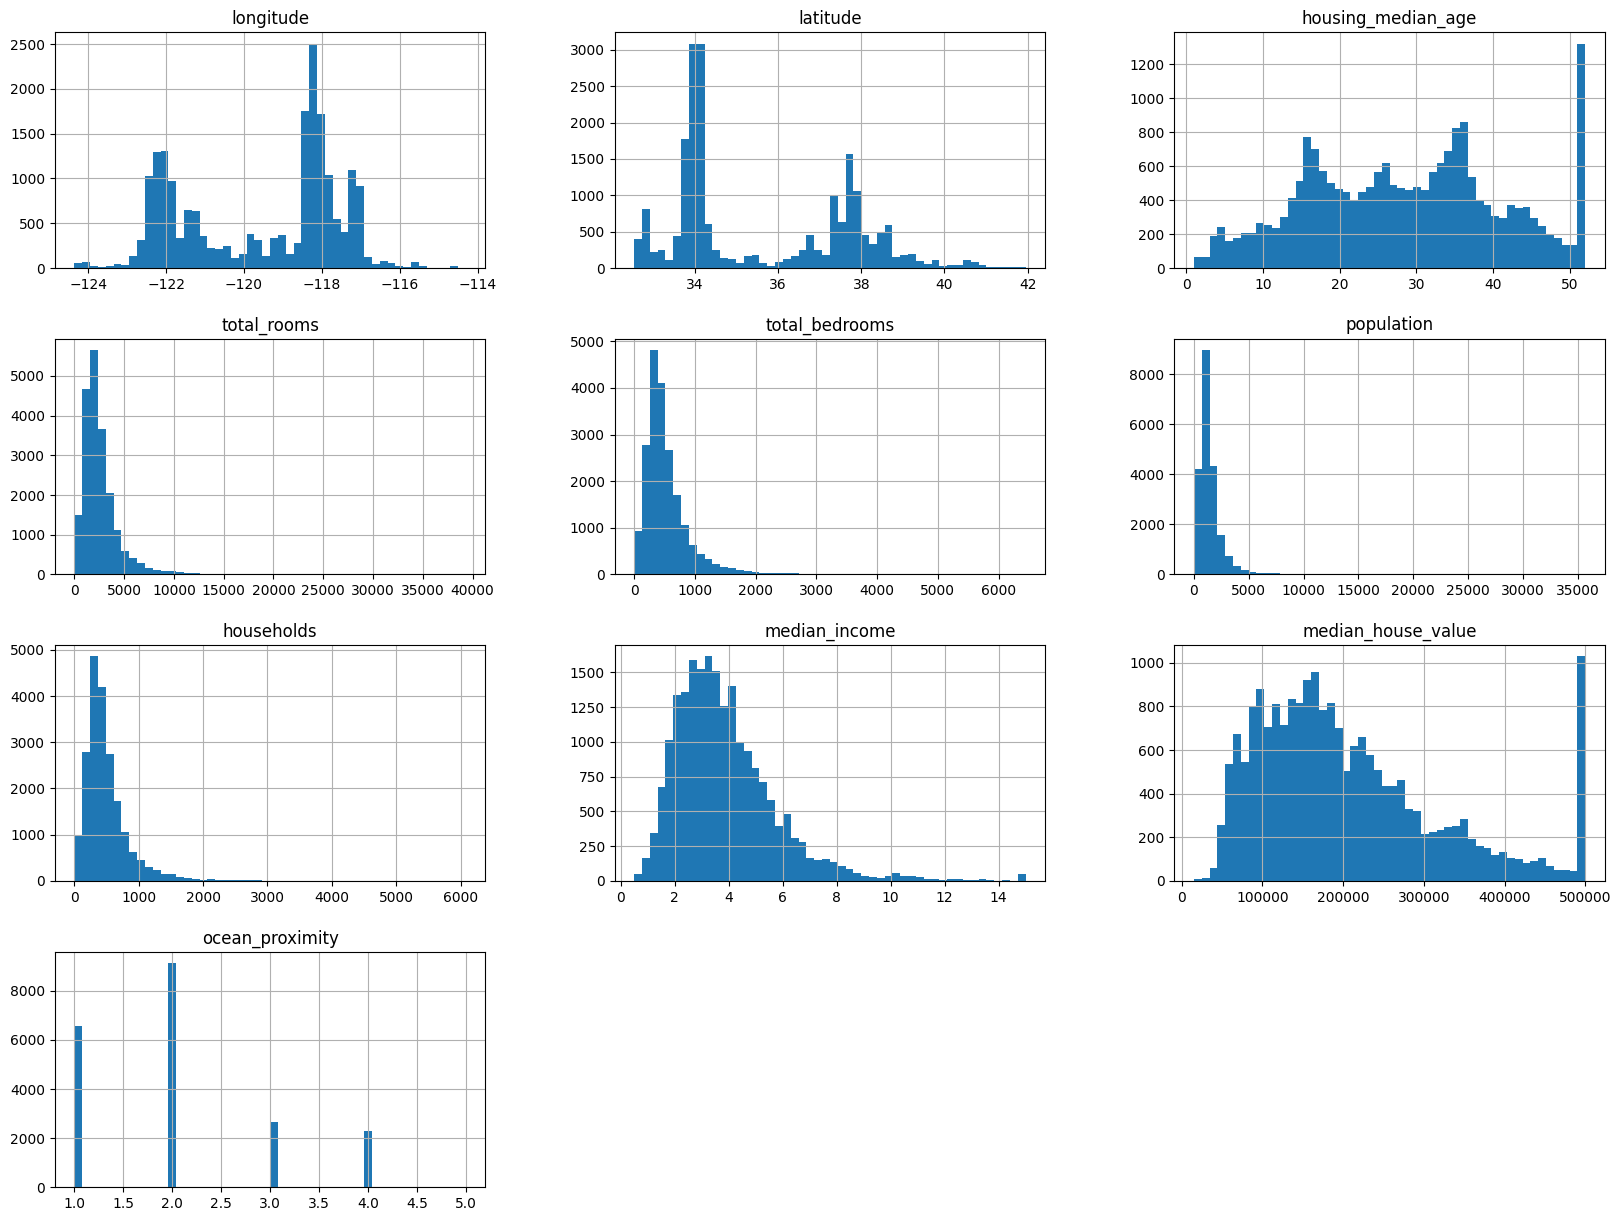

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50,figsize=(20,15));

## Creating a Test Set

Purely Random Sampling.

Good for large dataset, but for small dataset, it can introduce sampling bias.

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2,random_state=101)

We use Stratified Sampling to ensure te test set is representative of entire population.

In this, we divide the population into homogenous subgroups called *strata*, and right number of instances are sampled from each stratum to guarantee that the test set is representative of entire population.

<Axes: >

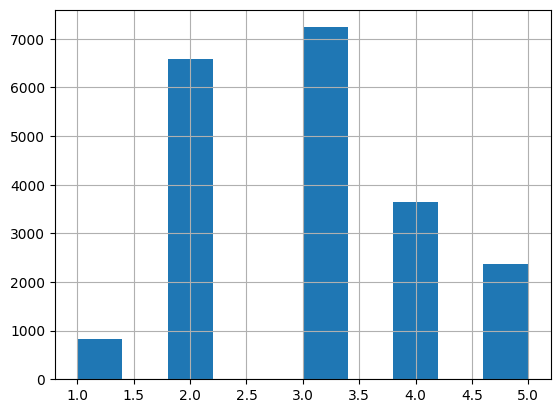

In [11]:
# Creating strata or categories for median_income column
df['income_cat'] = pd.cut(df['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])
df["income_cat"].hist()

In [12]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [13]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
# Now remove the income_cat attribute
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

## Visualizing Data to gain insights

### Geographical Data

In [15]:
# Create a copy to play around without harming the training set
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

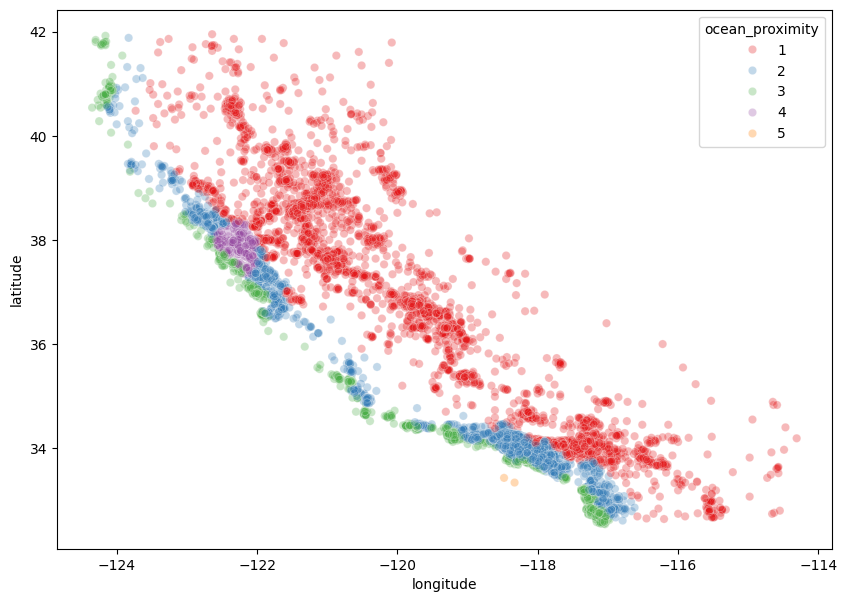

In [16]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(data = df,x='longitude',y='latitude',alpha=0.3,hue='ocean_proximity',palette='Set1')

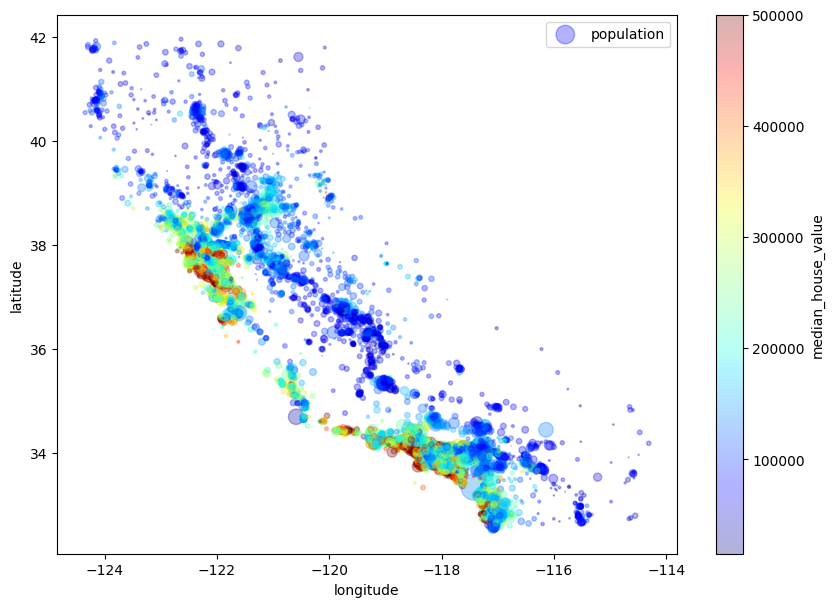

In [17]:
df.plot(kind = 'scatter',x='longitude',y='latitude',alpha=0.3,
        s=df['population']/100,label="population",figsize=(10,7),
        c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True);

### Correlation Matrix

<Axes: >

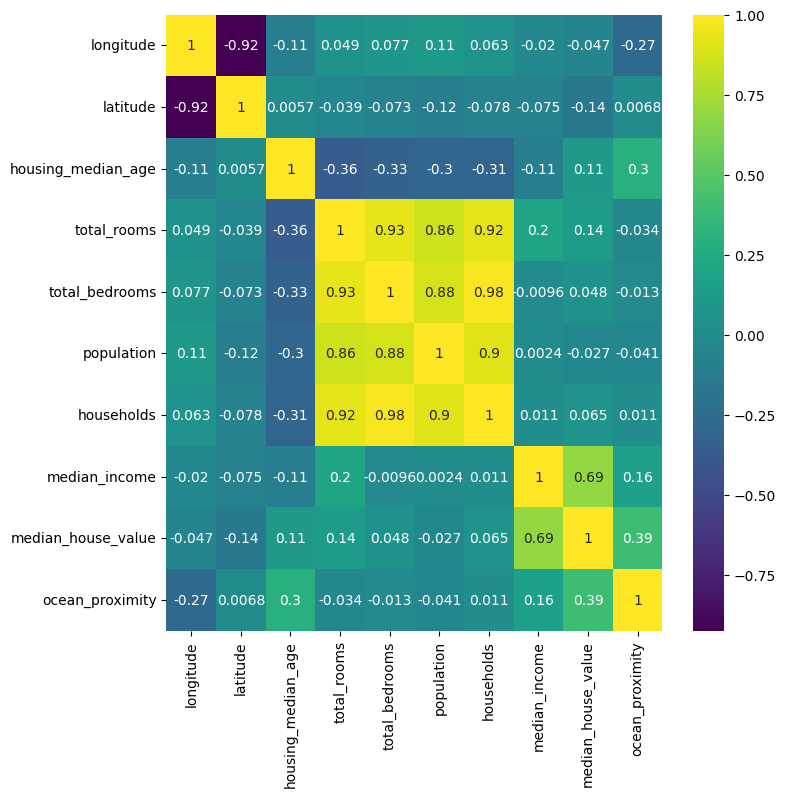

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='viridis',annot = True)

### PairPlot or Scatter Matrix

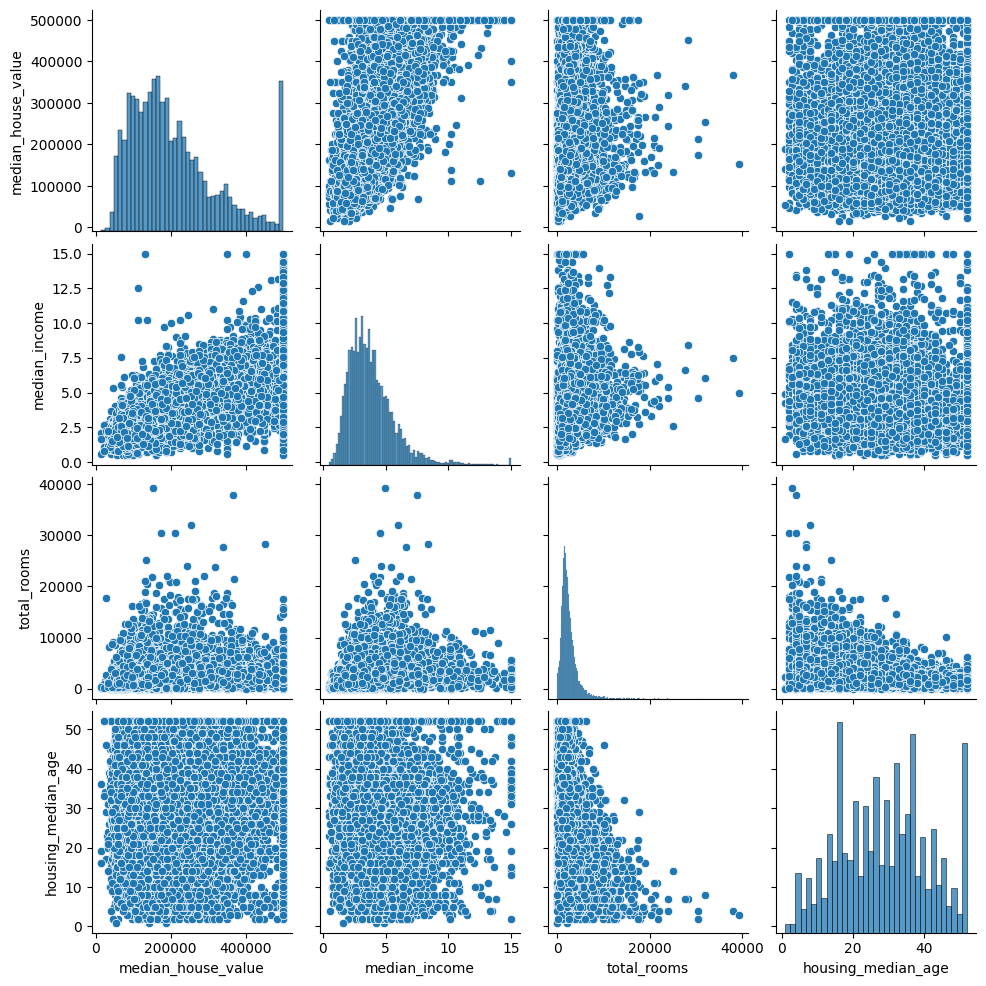

In [19]:
sns.pairplot(data = df[['median_house_value','median_income','total_rooms','housing_median_age']])

### Experimenting with attribute combinations

In [20]:
df['rooms_per_house'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_house'] = df['population']/df['households']

In [21]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
ocean_proximity         0.392716
rooms_per_house         0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
population_per_house   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
bedrooms_per_room      -0.259952
Name: median_house_value, dtype: float64

`rooms_per_house` is an useful attribute, as it has greater correlation than both `total_rooms` and `households` attributes.

Similarly, `bedrooms_per_room` has a strong negative correlation.

## Prepare Data for ML Algorithms

In [22]:
X_train = strat_train_set.drop("median_house_value",axis = 1)
y_train = strat_train_set['median_house_value'].copy()

### Cleaning the data

In [23]:
X_train[X_train['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,4
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,2
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,2
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,2
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,3
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,1
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,2
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,2
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,3


In [24]:
# We will be filling the NaN values with median of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns,index=X_train.index)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


### Custom Transfomers

Here we make a custom Transformer Class to add the combination atributes we tried out in the previous section.

In [26]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_house = X[:, rooms_ix]/X[:, households_ix]
        population_per_house = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_house,population_per_house,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_house,population_per_house]
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
X_train_extra_attribs = attr_adder.transform(X_train.values)

### Feature Scaling

There are 2 ways:
* **Normalization/ Min-Max Scaling** - Subtract minimum value from current value and divide the result by difference of maximum and minimum of the column. New values are in range of 0 to 1.
Done using `sklearn.preprocesssing.MinMaxScaler()`

* **Standardization** - Subtract mean value of attribute from current value and divide by Standard Deviation of the Attribute.It doesn't bind the values to a specific range, but is much less affected by outliers than normalization.
Done using `sklearn.preprocessing.StandardScaler()`

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('attribute_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

X_train_prepd = pipe.fit_transform(X_train)

In [28]:
X_train_prepd

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

## Select and Train a Model

### Training and evaluating on the train set

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepd,y_train)

LinearRegression()

In [30]:
some_random_X_data = X_train.iloc[:5]
some_random_y_data = y_train.iloc[:5]
some_prepared_X_data = pipe.transform(some_random_X_data)

print("Predicted:",lin_reg.predict(some_prepared_X_data))
print("Actual values:",list(some_random_y_data))

Predicted: [ 86944.6132081  305103.31365052 165574.35021811 187940.87489066
 238683.62085591]
Actual values: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [31]:
from sklearn.metrics import mean_squared_error
print("RMSE:",np.sqrt(mean_squared_error(some_random_y_data,lin_reg.predict(some_prepared_X_data))))

RMSE: 51827.429497822566


The model is too simple to capture the model's complexity. In other words, the model is underfitting on the data.

Let's try a more complex model.

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(some_prepared_X_data,some_random_y_data)

print("RMSE:",np.sqrt(mean_squared_error(some_random_y_data,tree_reg.predict(some_prepared_X_data))))

RMSE: 0.0


Badly Overfitted, or a perfect model......We need to evaluate the model on a larger scale to be sure.

### Validation using Cross-Validation

We can use `train_test_split` to split the training set into a smaller training set with a validation set.

Alternatively, we can use Sklearn's *K-fold cross-validation* feature.

The following code randomly splits training set into 10 distinct subsets, called *folds* and evaluates the given model 10 times, picking a different fold each time for evaluation. and training on rest of 9.

Result is an array containing 10 evaluation scores.

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,X_train_prepd,y_train,scoring = 'neg_mean_squared_error',cv = 10)

tree_rmse_scores = np.sqrt(-scores)

The reason for 'neg_mean_squared_error' in `scoring` parameter is that Sklearn's cross-validation features expect a utility function (greater is better), rather than an cost function (lower is better).

Therefore, we have to calculate `-scores` during square root (for RMSE).

In [34]:
print(f"RMSE Scores : {tree_rmse_scores}\nMean : {tree_rmse_scores.mean()}\nStD : {tree_rmse_scores.std()}")

RMSE Scores : [72623.26978792 71846.65008707 68952.54798817 72418.22210073
 70718.02944763 75334.43412655 71257.99120464 74561.3962034
 68122.59752329 71575.7620637 ]
Mean : 71741.09005330954
StD : 2104.5419004365153


Let's try the same for the linear regression model.

In [35]:
scores = cross_val_score(lin_reg,X_train_prepd,y_train,scoring = 'neg_mean_squared_error',cv = 10)

lin_rmse_scores = np.sqrt(-scores)

print(f"RMSE Scores : {lin_rmse_scores}\nMean : {lin_rmse_scores.mean()}\nStD : {lin_rmse_scores.std()}")

RMSE Scores : [72109.07662326 64849.68450268 68190.54592672 68906.34049049
 67432.61678834 73000.5813742  75545.66376344 69360.28706584
 67033.08715137 70523.97176721]
Mean : 69695.18554535354
StD : 3005.839869178193


Both are equally bad, Linear Regression just slightly better.

Let's try KNN next.

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9)

scores = cross_val_score(knn_reg,X_train_prepd,y_train,scoring = 'neg_mean_squared_error',cv = 10)

knn_rmse_scores = np.sqrt(-scores)
print(f"RMSE Scores : {knn_rmse_scores}\nMean : {knn_rmse_scores.mean()}\nStD : {knn_rmse_scores.std()}")

RMSE Scores : [64274.01996098 57445.09642416 57349.62111652 64900.40012536
 57745.55407543 62641.532017   61312.21200084 61679.43120554
 59281.6324129  63106.47441472]
Mean : 60973.59737534406
StD : 2704.1289289336846


This is much better. 

Next is Random Forests.

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

scores = cross_val_score(rf_reg,X_train_prepd,y_train,scoring = 'neg_mean_squared_error',cv = 10)

rf_rmse_scores = np.sqrt(-scores)
print(f"RMSE Scores : {rf_rmse_scores}\nMean : {rf_rmse_scores.mean()}\nStD : {rf_rmse_scores.std()}")

RMSE Scores : [51453.27146986 49455.10971151 46770.18656618 51786.76102015
 47391.4087253  51780.36945455 52760.26036929 50178.03657667
 48405.65795943 53909.02255809]
Mean : 50389.008441103986
StD : 2235.339337628422


This is the best model so far.

Let's settle for now. We will be testing SVR after we learn fine Tuning, since SVR has a large training time for more number of attributes.

### Grid Search - Find best hyperparameter values from the given set of values to try.

In [38]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [39]:
param_grid = {'n_estimators':[30,32,35,37,40],
     'max_features':[6],
     }

forest_reg = RandomForestRegressor()
grid_src = GridSearchCV(forest_reg,param_grid,cv=5,scoring = 'neg_mean_squared_error',
                        return_train_score=True)

grid_src.fit(X_train_prepd,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6],
                         'n_estimators': [30, 32, 35, 37, 40]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_src.best_estimator_.feature_importances_

array([0.06809028, 0.06157662, 0.04356001, 0.01527736, 0.01492739,
       0.0150287 , 0.01443087, 0.3713443 , 0.15611514, 0.04735573,
       0.11509989, 0.07719373])

In [41]:
print([cn for cn in X_train.columns]+(['rooms_per_house','population_per_house','bedrooms_per_room']))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_house', 'population_per_house', 'bedrooms_per_room']


In [42]:
grid_src.cv_results_

{'mean_fit_time': array([2.11389513, 1.99536238, 2.1669632 , 2.39815125, 2.64225125]),
 'std_fit_time': array([0.47283529, 0.03855189, 0.02839053, 0.10944394, 0.09334724]),
 'mean_score_time': array([0.02357702, 0.02325554, 0.0233192 , 0.02884016, 0.02773175]),
 'std_score_time': array([0.00716316, 0.00233349, 0.0013403 , 0.00697117, 0.0042514 ]),
 'param_max_features': masked_array(data=[6, 6, 6, 6, 6],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[30, 32, 35, 37, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 6, 'n_estimators': 30},
  {'max_features': 6, 'n_estimators': 32},
  {'max_features': 6, 'n_estimators': 35},
  {'max_features': 6, 'n_estimators': 37},
  {'max_features': 6, 'n_estimators': 40}],
 'split0_test_score': array([-2.48884486e+09, -2.61514669e+09, -2.46714710e+09, -2.4785

## Evaluating our best model on the test set.

In [43]:
final_model = grid_src.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis = 1)
y_test  = strat_test_set['median_house_value'].copy()

X_test_prepared = pipe.transform(X_test)

final_preds = final_model.predict(X_test_prepared)

print("Final RMSE:",np.sqrt(mean_squared_error(y_test,final_preds)))

Final RMSE: 48193.57259084144


In [44]:
# Computing 95% confidence interval for the generalization error

from scipy import stats
confidence = 0.95
squared_errors = (final_preds - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([46176.13991989, 50129.88111133])